In [ ]:
!pip install open3d
!pip install pyntcloud

In [ ]:
import numpy as np
import open3d as o3d
from pyntcloud import PyntCloud
import pandas as pd

In [ ]:
# Generate a tree (trunk and leaves)
def generate_tree(center, height, trunk_radius, leaves_radius, trunk_points=1000, leaves_points=2000):
    """Generate realistic tree point cloud."""
    # Trunk (cylinder)
    theta = np.random.uniform(0, 2 * np.pi, trunk_points)
    z = np.random.uniform(0, height, trunk_points)
    x = trunk_radius * np.cos(theta) + center[0]
    y = trunk_radius * np.sin(theta) + center[1]
    trunk = np.vstack([x, y, z]).T

    # Leaves (sphere at the top)
    phi = np.random.uniform(0, np.pi, leaves_points)
    theta = np.random.uniform(0, 2 * np.pi, leaves_points)
    r = np.random.uniform(0, leaves_radius, leaves_points)
    x = r * np.sin(phi) * np.cos(theta) + center[0]
    y = r * np.sin(phi) * np.sin(theta) + center[1]
    z = r * np.cos(phi) + center[2] + height
    leaves = np.vstack([x, y, z]).T

    return trunk, leaves

In [ ]:
# Generate a building (cube)
def generate_building(center, width, depth, height, points=5000):
    """Generate realistic building point cloud."""
    x = np.random.uniform(center[0] - width / 2, center[0] + width / 2, points)
    y = np.random.uniform(center[1] - depth / 2, center[1] + depth / 2, points)
    z = np.random.uniform(center[2], center[2] + height, points)
    building = np.vstack([x, y, z]).T
    return building

In [ ]:
# Generate a car (rectangular cuboid with smaller height)
def generate_car(center, length, width, height, points=2000):
    """Generate realistic car point cloud."""
    x = np.random.uniform(center[0] - length / 2, center[0] + length / 2, points)
    y = np.random.uniform(center[1] - width / 2, center[1] + width / 2, points)
    z = np.random.uniform(center[2], center[2] + height, points)
    car = np.vstack([x, y, z]).T
    return car

In [ ]:
# Generate a person (cylinder)
def generate_person(center, height, radius, points=1000):
    """Generate realistic person point cloud."""
    theta = np.random.uniform(0, 2 * np.pi, points)
    z = np.random.uniform(0, height, points)
    x = radius * np.cos(theta) + center[0]
    y = radius * np.sin(theta) + center[1]
    person = np.vstack([x, y, z]).T
    return person

In [ ]:
# Combine all objects into a single point cloud
def combine_objects_with_labels(objects):
    """Combine multiple objects into one point cloud with labels."""
    all_points = []
    all_colors = []
    all_labels = []
    label_counter = 1  # Start labels from 1 for each unique object type

    for obj_points, obj_color in objects:
        all_points.append(obj_points)
        colors = np.tile(obj_color, (len(obj_points), 1))
        all_colors.append(colors)
        labels = np.full(len(obj_points), label_counter, dtype=np.int32)
        all_labels.append(labels)
        label_counter += 1

    # Concatenate points, colors, and labels
    combined_points = np.vstack(all_points)
    combined_colors = np.vstack(all_colors)
    combined_labels = np.hstack(all_labels)

    return combined_points, combined_colors, combined_labels

In [ ]:
# Generate individual objects
tree_trunk, tree_leaves = generate_tree(center=[0, 5, 0], height=3, trunk_radius=0.3, leaves_radius=1.5)
building = generate_building(center=[-10, -5, 0], width=5, depth=5, height=10)
car = generate_car(center=[5, 0, 0], length=4, width=2, height=1.5)
person = generate_person(center=[3, 3, 0], height=1.8, radius=0.3)

In [ ]:
# Assign colors and labels to objects
objects = [
    (tree_trunk, [0.5, 0.25, 0.1]),  # Brown trunk
    (tree_leaves, [0.1, 0.8, 0.1]),  # Green leaves
    (building, [0.6, 0.6, 0.6]),     # Gray building
    (car, [0.9, 0.1, 0.1]),          # Red car
    (person, [0.1, 0.1, 0.8])        # Blue person
]

In [ ]:
# Combine objects into a single point cloud
points, colors, labels = combine_objects_with_labels(objects)

In [ ]:
# Create Open3D point cloud
point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(points)
point_cloud.colors = o3d.utility.Vector3dVector(colors)

In [ ]:
# Save point cloud and labels
o3d.io.write_point_cloud("optimized_point_cloud_with_labels.ply", point_cloud)
np.savetxt("point_cloud_labels.txt", labels, fmt='%d', header="Labels for each point")

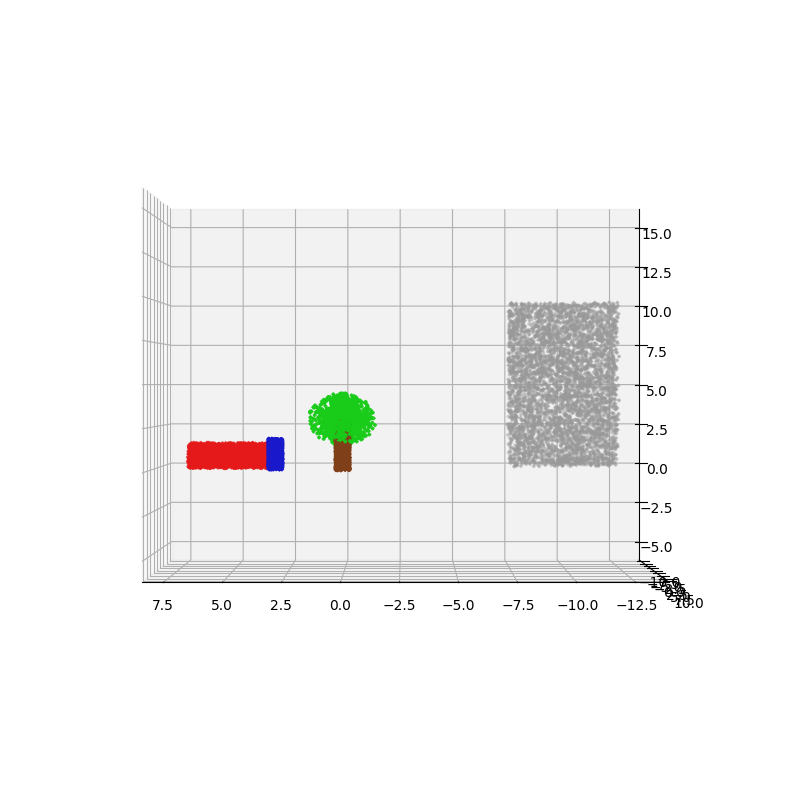

Optimized point cloud saved as 'optimized_point_cloud_with_labels.ply'
Labels saved as 'point_cloud_labels.txt'


In [ ]:
# PyntCloud visualization
cloud_data = pd.DataFrame(points, columns=["x", "y", "z"])
cloud_data["red"] = (colors[:, 0] * 255).astype(np.uint8)
cloud_data["green"] = (colors[:, 1] * 255).astype(np.uint8)
cloud_data["blue"] = (colors[:, 2] * 255).astype(np.uint8)
cloud_data["label"] = labels

cloud = PyntCloud(cloud_data)
cloud.plot()

print("Optimized point cloud saved as 'optimized_point_cloud_with_labels.ply'")
print("Labels saved as 'point_cloud_labels.txt'")